<a href="https://colab.research.google.com/github/dwds186/alphaco_test/blob/main/20241007/alphaco_241007jaehyun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


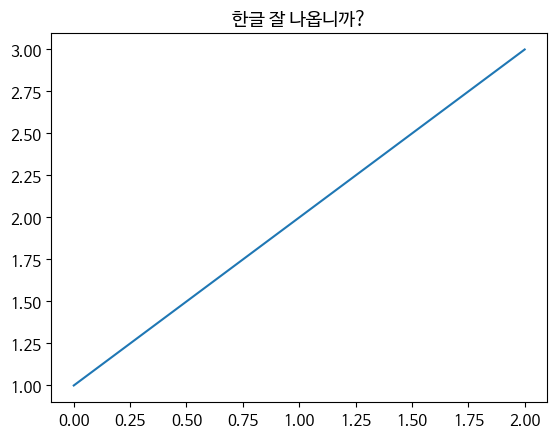

In [ ]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# z검정, t 검정


In [ ]:
import pandas as pd
df = pd.DataFrame({"grades" : [50, 60, 60, 64, 66, 66, 67, 69, 70, 74, 76, 76, 77, 79, 79, 79, 81, 82, 82, 89]})
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


-모수의 표준편차는 9.5로 알고 있음

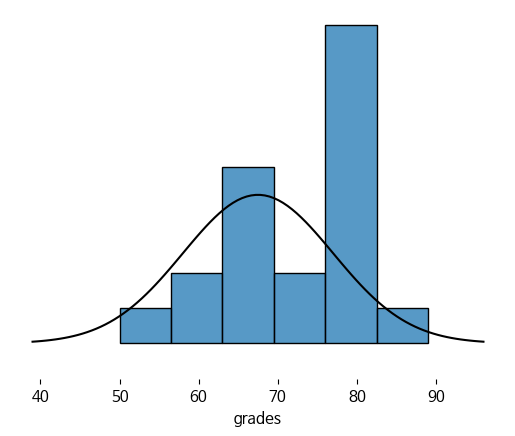

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 67.5 #모수의 평균
sigma = 9.5 #모수의 표준편차
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df['grades'])

ax2 = sns.lineplot(x=x,y=y, color='black')

plt.ylim(bottom=-1)

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.show()

## 가설 수립
- ㅇㅇㅇ라면, ~일거에요. (이런식으로 가설 수립하면 안 돼요!)


- 귀무가설 : 평균의 차이가 없다!
- 대립가설 : 평균의 차이가 있다!


귀무가설
모집단의 수학점수 평균과 1반의 수학점수 평균차이는 없다!

대립가설
모집단의 수학점수 평균과 1반의 수학점수 평균차이는 있다!

## z-score 구하기

In [ ]:
import math
sample_mean = df['grades'].mean()
sd_true = 9.5
mu_null = 67.5
N = len(df['grades'])
sem_true = sd_true / math.sqrt(N)
z_score = (sample_mean - mu_null) / sem_true
z_score # 통계량

2.259605535157681

## p-value


In [ ]:
from statistics import NormalDist

lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

0.023845743764939864

귀무가설(평균 차이 없어!) 기각 ==> 대립가설(평균 차이 있어!) 채택

이렇게 생각하면 편해!


냉정하게 말하면 신뢰도 구간은 95로 할지 뭐로 할지 그냥 연구자 본인이 정하면 됨
표준정규분포표를 통해서 보통은 계산을 하지
95%로 하는 것이 일반적이어서 표준화된 z값으로 1.96 뭐 이렇게 계산 함



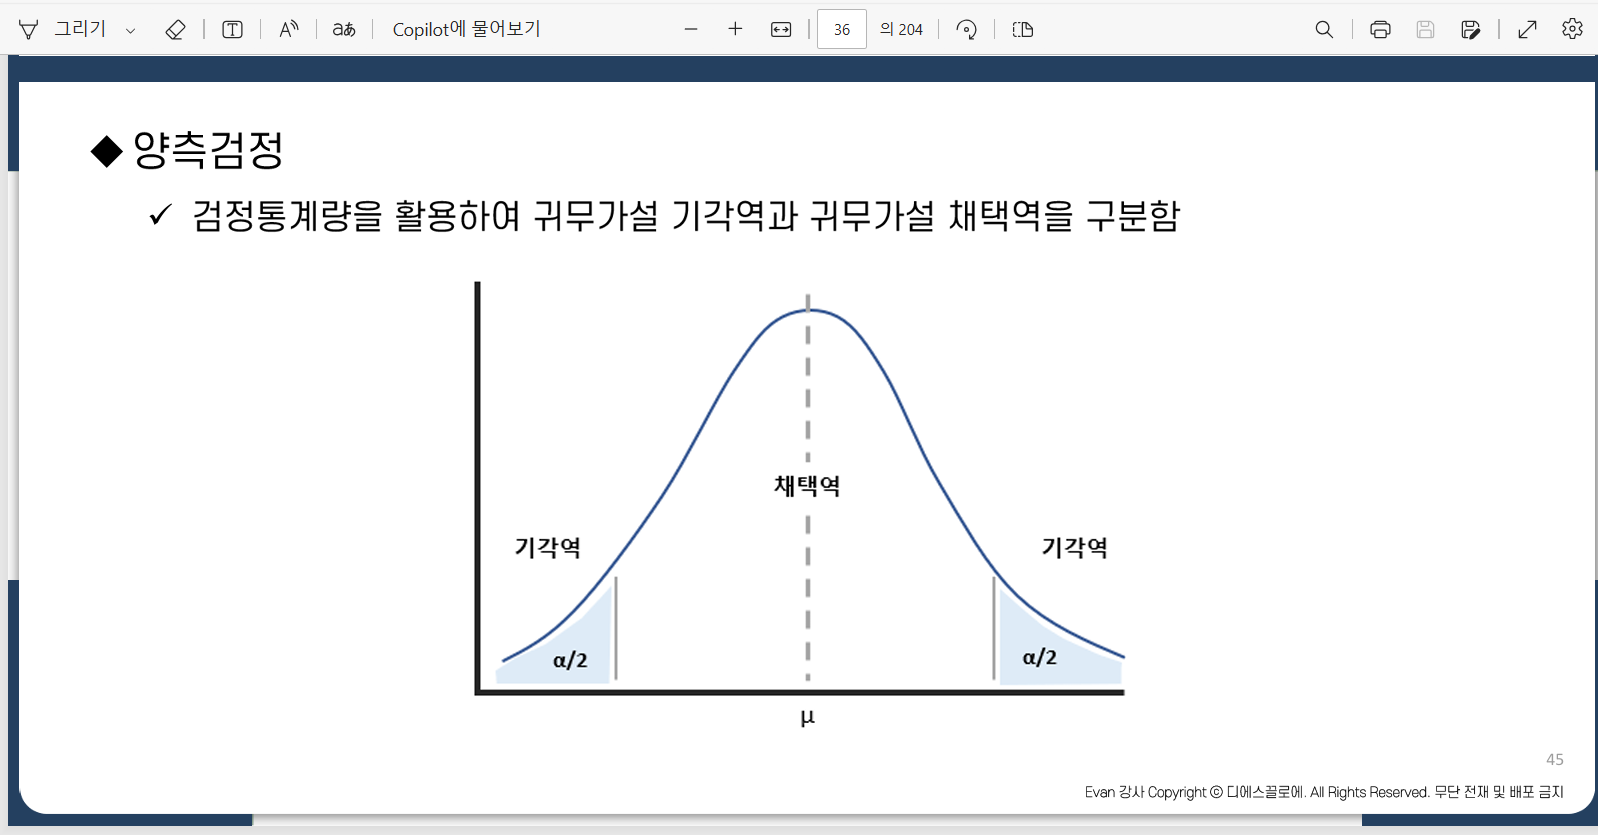

잠깐 쉬었다가 t검정 들어갑니다

# t-검정의 종류

- One-Sample t-test (일표본 단일검정)
- Paired t-test (대응표본)
- Independent t-test(두 평균의 비교, 독립검정)

## One-Sample t-test (일표본 단일검정)
- 일표본 단일검정
- z-검정과의 차이점
 + 모집단의 표준편차를 모름
 + 모집단의 평균을 알고 있음
 + 자유도 : N-1 (단, z-검정은 N)

 (사실 논리적으로 보면 이상할 수 있음...)

- 모집단의 평균 : 사회적인 통념, 알려진 사실
(ex. 초코칩 과자 중량이 포장지 겉에 45g이라고 적혀 있음,
과거에 우리 회사 제품에 샘플 사이즈는 몇 이었음,
10년 전 남자 평균 키는 x cm였음 등
)

- 가설설정
 + 귀무가설 : 모집단의 평균과 표본의 평균은 같다
   - 오리온 초코칩의 무게중량 45g이 맞을 것이야!

 + 대립가설 : 모집단의 평균과 표본의 평균은 다르다
   - 오리온 초코칩의 무게중량 45g이 아닐거야!










In [ ]:
from scipy.stats import ttest_1samp

t, p = ttest_1samp(a=df['grades'], popmean=67.5)
t,p

#위에 있는 t,p와는 값이 아주 미세하지만 차이가 있을 것입니다.


(2.25471286700693, 0.03614521878144544)

In [ ]:
from scipy.stats import ttest_1samp

t, p = ttest_1samp(a=df['grades'], popmean=71)
t,p
#popmean을 임의로 71로 해서 코드 한 번 돌려볼게요

'''
sample mean은 72.3이니까
단순하게 비교하면 72.3과 71은 다름

샘플 평균과 popmean이 달라 보이지만...
이건 귀무가설 채택의 영역임
왜냐하면 t의 값이 0.61xxxx니까

그래서 지금은 결론을 내릴 수가 없는 상황이에요

조사 중이라고 하고 넘어가야 해...
print(t,p)
'''

'''
분석의 마지막은 결국은 보고서 작성이에요...


'''

print(t,p)

0.6106514014810425 0.5486662606700853


- 신뢰구간 추정
(신뢰구간을 구해서 구간추정하는 것임)


In [ ]:
from scipy import stats

confidence_level = 0.95
degrees_freedom = len(df['grades'])-1
sample_mean = df['grades'].mean()
sample_standard_error = df['grades'].sem()

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
'''
(67.84421513791415, 76.75578486208585) 신뢰구간은 이렇게 나옴

해석하자면...
sample에 따라서 평균보다 높을 수도 있고 낮을 수도 있음



'''

confidence_interval

(67.84421513791415, 76.75578486208585)

In [ ]:
ttest_1samp(a=df['grades'], popmean=71).confidence_interval()

# 이렇게 메서드 하나만 서서 간단하게 끝낼 수 있음
#(67.84421513791415, 76.75578486208585) 신뢰구간은 이렇게 나옴
# 같은 수치
# ConfidenceInterval(low=67.84421513791415, high=76.75578486208585)

ConfidenceInterval(low=67.84421513791415, high=76.75578486208585)

## t-검정 (independent t-test)

- 가정 만족 확인 : 정규성과 등분산성 검정
- 정규성의 가설
  + 귀무가설 : 데이터가 정규분포를 만족한다.
  + 대립가설 : 데이터가 정규분포를 이루고 있지 않다.

- 등분산성 가설
  + 귀무가설 : 두 그룹의 분산이 같다.
  + 대립가설 : 두 그룹의 분산이 다르다.

- t-검정 가설검정



In [2]:
import seaborn as sns
import pandas as pd

tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


###시각화
- 독립성 검정을 시행할 수 있는 변수는 총 3개인 것 확인 가능

- 시나리오
  + 성별에 따라서 팁의 액수 평균 차이가 존재할까?
  + 흡연 여부에 따라서 팁의 액수 평균 차이가 존재할까?
  + 시간대에 따라서 팁의 액수 평균 차이가 존재할까?
  

In [3]:
tips['sex'].value_counts()

,count
sex,
Male,157
Female,87


In [4]:
tips['smoker'].value_counts()

,count
smoker,
No,151
Yes,93


In [5]:
tips['size'].value_counts()

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


- 히스토그램
  + 데이터가 연속형일 때, 숫자일 때 그래프 그려야 함
  + tip을 그립니다.




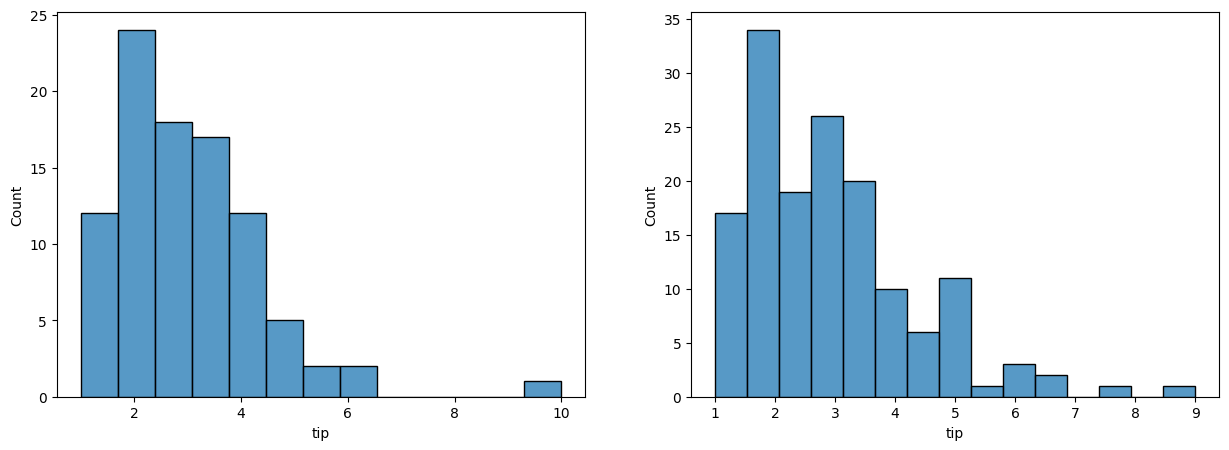

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 분리
smoker_yes = tips.loc[tips['smoker']=='Yes', : ]

smoker_no = tips.loc[tips['smoker']=='No', : ]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))


sns.histplot(smoker_yes['tip'], ax=ax[0])
sns.histplot(smoker_no['tip'], ax=ax[1])

'''
이거 중요함
모양을 보니 정규분포로 치기 어렵다.
하지만 정규분포 30개가 넘어가기 떄문에 사실 상 정규분포로 가정한다.


'''

plt.show()



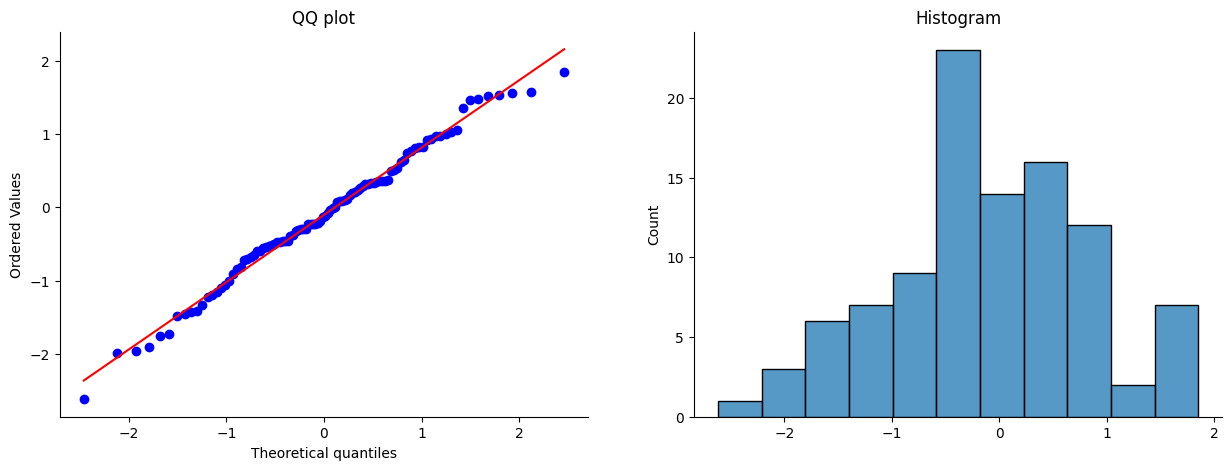

ShapiroResult(statistic=0.9898833815158516, pvalue=0.6551676754214818)

In [12]:
# 정규분포를 이루는 데이터
'''
참고하세요 이게 정규분포를 이루는 데이터입니다
'''
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
normal_data = np.random.normal(size=100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

### 샤피로 윌크 검정

- 데이터의 개수가 30개 미만이라는 가정 하에 정규성 검정 시행

(그래서 데이터의 개수가 충분히 많다면 굳이 할 필요는 없음)
(사실 이거 하게 될 경우 거의 없음)


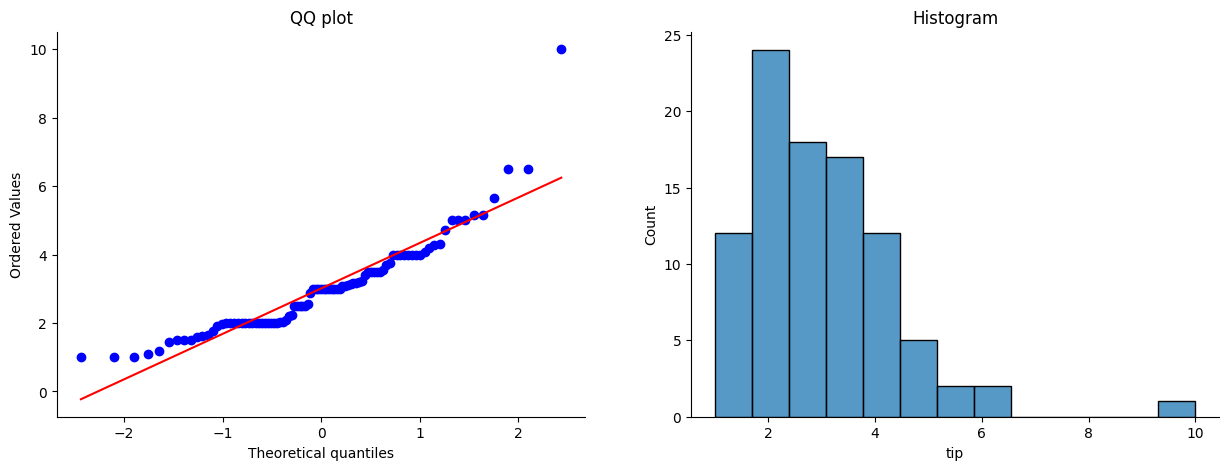

ShapiroResult(statistic=0.8788249661085323, pvalue=3.612564299352561e-07)

In [13]:
# 정규분포를 이루지 못하는 데이터
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
normal_data = smoker_yes['tip']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()
shapiro(normal_data)

빨간 기준 선(평균)에 파란 점이 많이 몰려 있어야 좋은 정규 분포임



### 가설설정
  + 귀무가설 : 데이터는 정규분포다
  + 대립가설 : 데이터는 정규분포가 아니다
  

### 등분산성 검정


In [15]:
from scipy import stats
'''
나한테 데이터는 크게 2가지
tips와 흡연 유무



tips
smoker_yes, smoker_no
'''
t,p=stats.levene(smoker_yes['tip'],smoker_no['tip'])
t,p

# 두 그룹의 분산이 같다고 p밸류를 보고 알 수 있음



(0.02051159105706963, 0.8862366542563406)

### 가설 검정

- 귀무가설 : 두 그룹의 평균은 같다
- 대립가설 : 두 그룹의 평균은 다르다

결론 : 귀무가설 채택하고, 두 그룹의 평균은 같다


- 두 그룹의 분산은 같다.

In [16]:
from scipy import stats
t_stat, p_val = stats.ttest_ind(smoker_yes['tip'], smoker_no['tip'], equal_var=True)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.09222805186888201
P-value: 0.9265931522244976


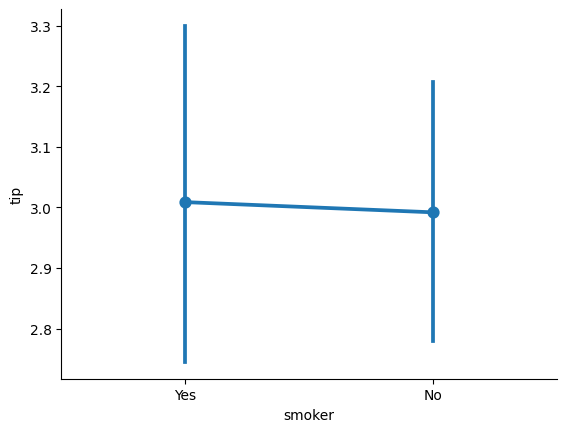

In [14]:
fig, ax = plt.subplots(1, 1)
sns.pointplot(x = 'smoker', y = 'tip', data = tips)
sns.despine()

# 이거 분산입니다

# yes가 no보다 분산이 조금 더 넓어보이긴 하네요



### 박스 플롯 시각화
 - 두 그룹의 박스플롯 시각화 결과 확인

 해보면

 진짜로 비슷함

 결론 : 흡연 여부랑 팁을 주는 거랑은 관계가 없다


 (추가적인 상상 결론 : 내가 종업원이라면, 팁을 더 받기 위해 흡연자 혹은 비흡연자에게 더 어필해야 한다 이런거 할 필요 없음)
 왜냐하면 흡연 여부랑 팁 주는 양은 큰 관계가 없으니까